In [20]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%store -r white_openings
the_master_df = pd.read_csv("csv_files/master_df.csv")

In [21]:
#Creating dataframes for each color

white_df = the_master_df.where(the_master_df['white_name'] == 'jsteele619')
white_df = white_df.dropna()
black_df = the_master_df.where(the_master_df['black_name'] == 'jsteele619')
black_df = black_df.dropna()

In [22]:
# Creating DF for each time control
white_df5 = the_master_df.where(the_master_df['white_name'] == 'jsteele619').where(the_master_df['time_control'] == '300')
black_df5 = the_master_df.where(the_master_df['black_name'] == 'jsteele619').where(the_master_df['time_control'] == '300')
white_df10 = the_master_df.where(the_master_df['white_name'] == 'jsteele619').where(the_master_df['time_control'] == '600')
black_df10 = the_master_df.where(the_master_df['black_name'] == 'jsteele619').where(the_master_df['time_control'] == '600')

ValueError: could not convert string to float: '2012-10-18'

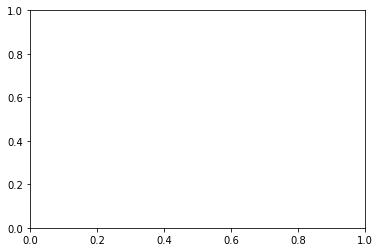

In [23]:
# Graphing Blitz Rating results by time control
fig = plt.figure()
ax = plt.axes()

ax.plot(white_df5["date"], white_df5["white_rating"], label="5 mins per side")
ax.plot(white_df10["date"], white_df10["white_rating"], label="10 mins per side", color='green')
ax.plot(black_df5["date"], black_df5["black_rating"], label="10 mins per side", color='blue')
ax.plot(black_df10["date"], black_df10["black_rating"], label="10 mins per side", color='green')

ax.legend(loc="best")
plt.title("White Blitz Rating over Time")
plt.xlabel("Date")
plt.ylabel("Rating")
plt.savefig("graphs/whiteblitz.png")
plt.show()

In [ ]:
# Plotting Time of Day vs Date
fig = plt.figure()
ax = plt.axes()

plt.scatter(white_df["date"], white_graph_time, label="5 mins per side")

ax.legend(loc="best")

plt.title("Time of Day played vs Date")
plt.xlabel("Date")
plt.ylabel("Time of Day")
plt.savefig("graphs/timeofday_date.png")
plt.show()

In [15]:
#Getting the bins for graphing Time of Day vs Result
white_graph_time = []
black_graph_time = []

for time in white_df['time']:
    white_graph_time.append(time.hour)  
    
for time in black_df['time']:
    black_graph_time.append(time.hour)
    
#Getting the list of bool results for graphing
    
white_graph_bool = []
black_graph_bool = []

for bools in white_df['white_bool']:
    white_graph_bool.append(bools)  
    
for bools in black_df['black_bool']:
    black_graph_bool.append(bools)   
    
#Combining lists

big_graph_time = white_graph_time + black_graph_time
big_graph_bool = white_graph_bool + black_graph_bool

print(f'Lengths of both lists: {len(big_graph_bool)} and {len(big_graph_time)}')

AttributeError: 'str' object has no attribute 'hour'

In [ ]:
zipped = {"big_graph_time": big_graph_time, "big_graph_bool": big_graph_bool}
zips = pd.DataFrame(zipped)

In [ ]:
#Creating list of frequency per result, per hour:
zips1 = zips.where(zips['big_graph_bool'] == 1.0)
zips5 = zips.where(zips['big_graph_bool'] == 0.5)
zips0 = zips.where(zips['big_graph_bool'] == 0.0)
zips1 = zips1.dropna()
zips0 = zips0.dropna()
zips5 = zips5.dropna()

In [ ]:
#Graphing wins per Time Hour
N = 25
ind = np.arange(N)
bins = ind

plt.hist(zips1['big_graph_time'], bins, width=0.8, label='Won', color='gold')

plt.xticks(ind)
plt.ylabel("Results")
plt.xlabel("Hours of the Day")
plt.legend(loc="best")
plt.title("Wins by Time of Day")
plt.savefig("graphs/winperhour.png")

plt.show()

In [ ]:
#Graphing draws per Time Hour
N = 25
ind = np.arange(N)
bins = ind

plt.hist(zips5['big_graph_time'], bins, width=0.8, label='draw', color='silver')

plt.xticks(ind)
plt.ylabel("Results")
plt.xlabel("Hours of the Day")
plt.legend(loc="best")
plt.title("Draws by Time of Day")
plt.savefig("graphs/drawperhour.png")
plt.show()

In [ ]:
#Graphing losses per Time Hour
N = 25
ind = np.arange(N)
bins = ind

plt.hist(zips0['big_graph_time'], bins, width=0.8, label='draw', color='#CD853F')

plt.xticks(ind)
plt.ylabel("Results")
plt.xlabel("Hours of the Day")
plt.legend(loc="best")
plt.title("Losses by Time of Day")
plt.savefig("graphs/lossperhour.png")

plt.show()

In [ ]:
#The Stacked Graph by hour
N = 25
ind = np.arange(N)
bins = ind

plt.hist([zips1['big_graph_time'], zips5['big_graph_time'], zips0['big_graph_time']], bins, color=['#CD853F', 'silver', 'gold'], label=['Won', 'Draw', 'Loss'], stacked=True)

plt.ylabel("Results")
plt.xlabel("Stacked Graph by Time of Day")
plt.legend(loc="best")
plt.title("Result by Time of Day")
plt.savefig("graphs/stackedperhour.png")

plt.show()